In [1]:
import networkx as nx
import pandas as pd
import os
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
import random
from itertools import islice
import time
from all_forms import all_formulations

In [2]:
# read demands
demand = open('Sprint/demand.txt', 'r')
lines = demand.readlines()
demands = []

for line in lines:
    demands.append(line.split())

demands = np.array(demands, dtype = float)
demands = np.max(demands, axis=0) #use the maximum demand over all times (rows) for each node-node pair

#demand = [float(i) for i in line.split()]
# n = int(len(demands)**0.5)
# demand = np.array(demands).reshape(n, n)

# np.fill_diagonal(demand, 0) #demand from a node to itself should be 0

In [3]:
def createGraph(n):
  edges = []
  cap = 1000000000
  for i in range(n-1):
      edges.append((int(i), int(i+1), int(cap)))
  edges.append((int(0), int(n-1), int(cap)))
  for i in range(n):
    for j in range(2):
      node = (i + random.randint(1, n-1)) % n
      tail = min(i, node)
      head = max(i, node)
      if (int(tail), int(head), int(cap)) not in edges:
          edges.append((int(tail), int(head), int(cap)))

  # generate graph
  G = nx.Graph()
  G.add_weighted_edges_from(edges)

  return G, len(edges)

In [4]:
def k_shortest_paths(G, source, target, k, weight=None):
    return list(
        islice(nx.shortest_simple_paths(G, source, target, weight=weight), k)
    )

In [5]:
def getDemand(n):
  newDemand = demands[np.random.choice(range(len(demands)), n**2)]
  newDemand = np.array(newDemand).reshape(n, n)
  np.fill_diagonal(newDemand, 0)
  return newDemand

In [6]:
res = {'maxThroughput' : [], 'minMLUObj' : [], 'minMLUConstraint': []}

In [7]:
edgeNum = {'G5':0, 'G10':0, 'G25':0, 'G50':0, 'G100':0, 'G200':0, 'G300':0, 'G400':0}

In [8]:
G5, G5_edges = createGraph(5)
demand5 = getDemand(5)
runtime5_maxThroughput, runtime5_minMLUObj, runtime5_minMLUConstraint = all_formulations(G5, demand5, 5)

edgeNum['G5'] = G5_edges
res['maxThroughput'].append(runtime5_maxThroughput)
res['minMLUObj'].append(runtime5_minMLUObj)
res['minMLUConstraint'].append(runtime5_minMLUConstraint)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-19
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 38 rows, 109 columns and 334 nonzeros
Model fingerprint: 0x178e741b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e+03, 1e+09]
Presolve removed 38 rows and 109 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.7214401e+06   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.721440122e+06
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical 

In [9]:
G10, G10_edges = createGraph(10)
demand10 = getDemand(10)
runtime10_maxThroughput, runtime10_minMLUObj, runtime10_minMLUConstraint = all_formulations(G10, demand10, 10)

edgeNum['G10'] = G10_edges
res['maxThroughput'].append(runtime10_maxThroughput)
res['minMLUObj'].append(runtime10_minMLUObj)
res['minMLUConstraint'].append(runtime10_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 138 rows, 474 columns and 1562 nonzeros
Model fingerprint: 0xb313dfe5
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+03, 1e+09]
Presolve removed 138 rows and 474 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.0603071e+07   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.060307053e+07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 163 rows, 476 

In [10]:
G25, G25_edges = createGraph(25)
demand25 = getDemand(25)
runtime25_maxThroughput, runtime25_minMLUObj, runtime25_minMLUConstraint = all_formulations(G25, demand25, 25)

edgeNum['G25'] = G25_edges
res['maxThroughput'].append(runtime25_maxThroughput)
res['minMLUObj'].append(runtime25_minMLUObj)
res['minMLUConstraint'].append(runtime25_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 738 rows, 3069 columns and 11442 nonzeros
Model fingerprint: 0x2c320cd0
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 738 rows and 3069 columns
Presolve time: 0.01s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.3450546e+08   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.345054598e+08
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 808 rows, 3

In [11]:
G50, G50_edges = createGraph(50)
demand50 = getDemand(50)
runtime50_maxThroughput, runtime50_minMLUObj, runtime50_minMLUConstraint = all_formulations(G50, demand50, 50)

edgeNum['G50'] = G50_edges
res['maxThroughput'].append(runtime50_maxThroughput)
res['minMLUObj'].append(runtime50_minMLUObj)
res['minMLUConstraint'].append(runtime50_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2736 rows, 12393 columns and 51596 nonzeros
Model fingerprint: 0xce9d6fe2
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 2736 rows and 12393 columns
Presolve time: 0.03s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.0340064e+08   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.05 seconds (0.02 work units)
Optimal objective  6.034006445e+08
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2880 ro

In [12]:
G100, G100_edges = createGraph(100)
demand100 = getDemand(100)
runtime100_maxThroughput, runtime100_minMLUObj, runtime100_minMLUConstraint = all_formulations(G100, demand100, 100)

edgeNum['G100'] = G100_edges
res['maxThroughput'].append(runtime100_maxThroughput)
res['minMLUObj'].append(runtime100_minMLUObj)
res['minMLUConstraint'].append(runtime100_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10486 rows, 49793 columns and 226348 nonzeros
Model fingerprint: 0x8840edad
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 10486 rows and 49793 columns
Presolve time: 0.14s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.3018714e+09   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.18 seconds (0.07 work units)
Optimal objective  2.301871401e+09
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1078

In [13]:
G200, G200_edges = createGraph(200)
demand200 = getDemand(200)
runtime200_maxThroughput, runtime200_minMLUObj, runtime200_minMLUConstraint = all_formulations(G200, demand200, 200)

edgeNum['G200'] = G200_edges
res['maxThroughput'].append(runtime200_maxThroughput)
res['minMLUObj'].append(runtime200_minMLUObj)
res['minMLUConstraint'].append(runtime200_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 40990 rows, 199595 columns and 986292 nonzeros
Model fingerprint: 0x893174c8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 40990 rows and 199595 columns
Presolve time: 0.53s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    9.2697096e+09   0.000000e+00   0.000000e+00      1s

Solved in 0 iterations and 0.64 seconds (0.32 work units)
Optimal objective  9.269709621e+09
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41

In [14]:
G300, G300_edges = createGraph(300)
demand300 = getDemand(300)
runtime300_maxThroughput, runtime300_minMLUObj, runtime300_minMLUConstraint = all_formulations(G300, demand300, 300)

edgeNum['G300'] = G300_edges
res['maxThroughput'].append(runtime300_maxThroughput)
res['minMLUObj'].append(runtime300_minMLUObj)
res['minMLUConstraint'].append(runtime300_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 91486 rows, 449393 columns and 2325362 nonzeros
Model fingerprint: 0xa8943030
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 91486 rows and 449393 columns
Presolve time: 1.29s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1129930e+10   0.000000e+00   0.000000e+00      2s

Solved in 0 iterations and 1.57 seconds (0.77 work units)
Optimal objective  2.112993015e+10
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 9

In [15]:
G400, G400_edges = createGraph(400)
demand400 = getDemand(400)
runtime400_maxThroughput, runtime400_minMLUObj, runtime400_minMLUConstraint = all_formulations(G400, demand400, 400)

edgeNum['G400'] = G400_edges
res['maxThroughput'].append(runtime400_maxThroughput)
res['minMLUObj'].append(runtime400_minMLUObj)
res['minMLUConstraint'].append(runtime400_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 161976 rows, 799188 columns and 4297748 nonzeros
Model fingerprint: 0x574a1ee7
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 161976 rows and 799188 columns
Presolve time: 2.60s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.7240030e+10   0.000000e+00   0.000000e+00      3s

Solved in 0 iterations and 3.07 seconds (1.57 work units)
Optimal objective  3.724002957e+10
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with

In [21]:
G500, G500_edges = createGraph(500)
demand500 = getDemand(500)
runtime500_maxThroughput, runtime500_minMLUObj, runtime500_minMLUConstraint = all_formulations(G500, demand500, 500)

edgeNum['G500'] = G500_edges
res['maxThroughput'].append(runtime500_maxThroughput)
res['minMLUObj'].append(runtime500_minMLUObj)
res['minMLUConstraint'].append(runtime500_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 252488 rows, 1248994 columns and 6852566 nonzeros
Model fingerprint: 0x01dd207d
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 32427 rows and 458743 columns (presolve time = 5s) ...
Presolve removed 41519 rows and 543431 columns
Presolve time: 7.00s
Presolved: 210969 rows, 705563 columns, 1554807 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Ordering time: 0.23s

Barrier statistics:
 AA' NZ     : 7.537e+05
 Factor NZ  : 9.713e+05 (roughly 400 MB of memory)
 Factor Ops : 6.985e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal     

In [23]:
G750, G750_edges = createGraph(750)
demand750 = getDemand(750)
runtime750_maxThroughput, runtime750_minMLUObj, runtime750_minMLUConstraint = all_formulations(G750, demand750, 750)

edgeNum['G750'] = G750_edges
res['maxThroughput'].append(runtime750_maxThroughput)
res['minMLUObj'].append(runtime750_minMLUObj)
res['minMLUConstraint'].append(runtime750_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 566234 rows, 2810992 columns and 16082808 nonzeros
Model fingerprint: 0x1f20e964
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 2242 rows and 2242 columns (presolve time = 5s) ...
Presolve removed 2363 rows and 2242 columns (presolve time = 10s) ...
Presolve removed 2363 rows and 2242 columns (presolve time = 15s) ...
Presolve removed 2363 rows and 2242 columns (presolve time = 20s) ...
Presolve removed 2363 rows and 2242 columns (presolve time = 26s) ...
Presolve removed 2363 rows and 2242 columns
Presolve time: 32.94s
Presolved: 563871 rows, 2808750 columns, 15587829 nonzeros

Concurrent LP optimizer: dual simplex and barrier
Showing barrier lo

In [24]:
G1000, G1000_edges = createGraph(1000)
demand1000 = getDemand(1000)
runtime1000_maxThroughput, runtime1000_minMLUObj, runtime1000_minMLUConstraint = all_formulations(G1000, demand1000, 1000)

edgeNum['G1000'] = G1000_edges
res['maxThroughput'].append(runtime1000_maxThroughput)
res['minMLUObj'].append(runtime1000_minMLUObj)
res['minMLUConstraint'].append(runtime1000_minMLUConstraint)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-1030NG7 CPU @ 1.10GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1004982 rows, 4997991 columns and 29433390 nonzeros
Model fingerprint: 0xb6dcadd8
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 1e+09]
Presolve removed 0 rows and 0 columns (presolve time = 6s) ...
Presolve removed 2991 rows and 2991 columns (presolve time = 10s) ...
Presolve removed 2991 rows and 2991 columns (presolve time = 17s) ...
Presolve removed 2991 rows and 2991 columns (presolve time = 20s) ...
Presolve removed 2991 rows and 2991 columns (presolve time = 25s) ...
Presolve removed 2991 rows and 2991 columns (presolve time = 30s) ...
Presolve removed 2991 rows and 2991 columns
Presolve time: 43.00s
Presolved: 1001991 rows, 4995000 columns, 29427408 nonzeros

Co

In [25]:
pd.DataFrame(res).to_csv('time_results3.csv')

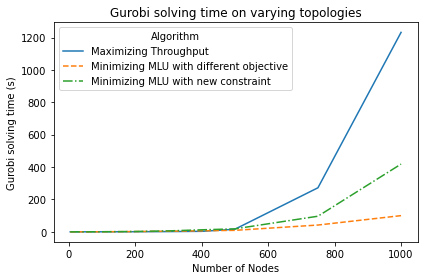

In [26]:
nodes_cnt = [5, 10, 25, 50, 100, 200, 300, 400, 500, 750, 1000]
formulation = ['Maximizing Throughput', 'Minimizing MLU with different objective', 'Minimizing MLU with new constraint']
times_df = pd.read_csv('time_results3.csv').drop(['Unnamed: 0'], axis=1)
line_style = ["-", "--", "-."]

for i, col in enumerate(times_df.columns):
    plt.plot(nodes_cnt, times_df[col], label = formulation[i], linestyle = line_style[i])

plt.title('Gurobi solving time on varying topologies')
plt.xlabel('Number of Nodes')
plt.ylabel('Gurobi solving time (s)')
plt.legend(title = 'Algorithm')
plt.tight_layout()
plt.show()

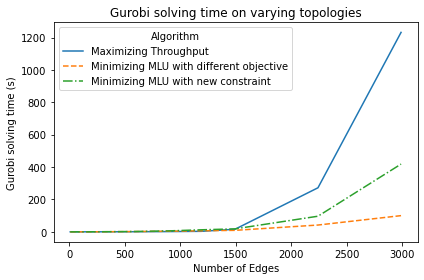

In [28]:
edge_cnt = [edgeNum['G5'], edgeNum['G10'], edgeNum['G25'], edgeNum['G50'], edgeNum['G100'], edgeNum['G200'], edgeNum['G300'], edgeNum['G400'], edgeNum['G500'], edgeNum['G750'], edgeNum['G1000']]
formulation = ['Maximizing Throughput', 'Minimizing MLU with different objective', 'Minimizing MLU with new constraint']
times_df = pd.read_csv('time_results3.csv').drop(['Unnamed: 0'], axis=1)
line_style = ["-", "--", "-."]

for i, col in enumerate(times_df.columns):
    plt.plot(edge_cnt, times_df[col], label = formulation[i], linestyle = line_style[i])

plt.title('Gurobi solving time on varying topologies')
plt.xlabel('Number of Edges')
plt.ylabel('Gurobi solving time (s)')
plt.legend(title = 'Algorithm')
plt.tight_layout()
plt.show()